## Predictive modeling 
### Week 5: Introduction to classification

In [1]:
# libraries
import pandas as pd # process dataframe
import numpy as np # scientific calculation
import seaborn as sns # visualization complete stastistics
import matplotlib.pyplot as plt # visualization
import math

### 1. Evaluation metrics
Consider the following array which the results of cat/dog classification model. How do we measure the success of the classification algorithm?

In [2]:
pred_labels = np.array(['cat', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'dog'])
act_labels = np.array(['cat', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 'dog', 'dog', 'dog'])

We will change the format of these arrays into a machine-readable language

In [3]:
pred = np.where(pred_labels=='cat', 1, 0)
act = np.where(act_labels=='cat', 1, 0)

display(pred, act)

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 0])

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 0])

The most primitive measurement is called the misclassification rate. The follwing array record the value when the prediction is not equal to actual.

In [4]:
def get_misclass(act, pred):
    misclass = np.where(act!=pred, 1, 0)
    misclass_rate = sum(misclass)/len(misclass)
    return misclass, misclass_rate

In [5]:
misclass, misclass_rate = get_misclass(act, pred)

display(misclass, misclass_rate)

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

0.2

Next, we will creating values for a confusion matrix. The results should like the chart below but we will learn how to get each field from scratch also.

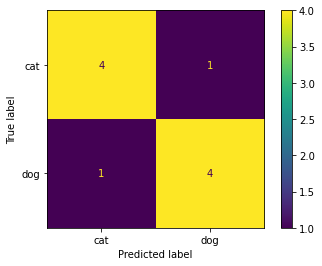

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(act, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['cat', 'dog'])
disp.plot()
plt.show()

Next, we will creating values for a confusion matrix. The results should like the chart below but we will learn how to get each field from scratch also. <br>

The first measure is called True Positive Rate. It is a number of predicted values that have a same class as the actual value and labeled as a positive class (in this case class = 1 or class = cat).

In [7]:
def get_tp(act, pred):
    tp = np.sum(np.where((act==pred)&(act==1), 1, 0))
    return tp
                
tp = get_tp(act, pred)
print(tp)

4


#### Quick exercise 1
Refer to the code structure to get true positive, you may the functions to get False Positive (FP), True Negative (TN), False Negative (FN). 

In [8]:
def get_tn(act, pred):
    # add the function here
    tn = np.sum(np.where((act==pred)&(act==0), 1, 0))
    return tn

def get_fp(act, pred):
    # add the function here
    fp = np.sum(np.where((act!=pred)&(act==1), 1, 0))
    return fp

def get_fn(act, pred):
    fn = np.sum(np.where((act!=pred)&(act==0), 1, 0))
    return fn

### Got a confusion matrix. Then, what else we can do? 
The values in the matrix itself don't tell pretty much story. In practice, we need to do another step of calculation to evaluate whether a classification model works nicely. Here are the list of common metrics in use. 

The first one called accuracy, it is a proportion between the number of correct predictions (true positive and false positive) and total number observations. Hence, the calculation looks like below.

In [9]:
def accuracy(TP, TN, FP, FN):
    correct_predict =  TP + TN
    total_obs = TP + TN + FP + FN
    accuracy = correct_predict/total_obs
    return accuracy

TP = get_tp(act, pred)
TN = get_tn(act, pred)
FP = get_fp(act, pred)
FN = get_fn(act, pred)

print(accuracy(TP, TN, FP, FN))

0.8


Good to know, accuracy is equal to 1 - misclassification rate.

In [10]:
accuracy_score = 1-misclass_rate 
print(accuracy_score)

0.8


Next to that, we can specifically focus on the positive and negative classes. <br>
We calculate recall (True positive rate) and specificity (True nagative rate) rates. Also, we can measure how precise is the positive prediction by compare it with total positive actual observation, this is called precision

In [11]:
def recall(TP, FN):
    recall = TP / (TP+FN)
    return recall

def specificity(TN, FP):
    specificity = TN / (TN+FP)
    return specificity

def precision(TP, FP):
    precision = TP / (TP+FP)
    return precision

print(recall(TP, FN))
print(specificity(TN, FP))
print(precision(TP, FP))

0.8
0.8
0.8


Everthing looks good until now. We have perfect accuracy of 80%, good recall and specificity also. The classification model works every well..perhaps we can conclude that. However, let's consider the case when we have unbalanced classes, for example, when it comes to the churn prediction where small numbers of customers are churned.   

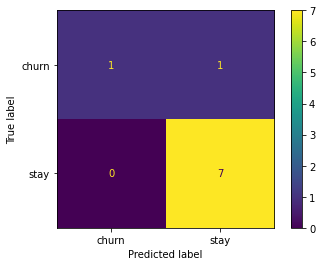

In [12]:
churn_act = np.array(['stay', 'churn', 'stay', 'stay', 'stay', 'stay', 'churn', 'stay', 'stay'])
churn_pred = np.array(['stay', 'stay', 'stay', 'stay', 'stay', 'stay', 'churn', 'stay', 'stay'])

cm = confusion_matrix(churn_act, y_pred=churn_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['churn', 'stay'])
disp.plot()
plt.show()

This model has an accuracy of 88.88%

In [13]:
churn_act = np.array(['stay', 'churn', 'stay', 'stay', 'stay', 'stay', 'churn', 'stay', 'stay', 'stay'])
churn_act = np.where(churn_act=='churn', 1, 0)
churn_pred = np.array(['stay', 'stay', 'stay', 'stay', 'stay', 'stay', 'churn', 'stay', 'stay', 'stay'])
churn_pred = np.where(churn_pred=='churn', 1, 0)

TP = get_tp(churn_act , churn_pred)
TN = get_tn(churn_act , churn_pred)
FP = get_fp(churn_act , churn_pred)
FN = get_fn(churn_act , churn_pred)

print(accuracy(TP, TN, FP, FN))

0.9


Deep dive to the number of who are predicted to be churned and compare with the actual data. 

In [14]:
display(precision(TP, FP))
display(recall(TP, FN))

0.5

1.0

Likewise, the number of customers who are predicted to stay and compare with the actual data

In [15]:
display(specificity(TN, FP))

0.8888888888888888

If the purpose of the model is to detect who are likely to churn, this model will not predict this class accurately as the recall is only 50%. So if there are 100 customers who are churning, we could visit only the half of them. <br>

The key takeaway of this example is that focusing on the accuracy itself might not be sufficient. However, to oversee the overall model performance, we can take the average scoring of true positive and true negative rate. This averaging method is called F-1 score.

In [16]:
def f_score(precision, recall):
    f_score = 2*((precision*recall)/(precision+recall))
    return f_score

In [17]:
precision = precision(TP, FP)
recall = recall(TP, FN)

print(f_score(precision, recall))

0.6666666666666666


### 2. Loss functions
We can't tell the computer directly to classify between cat and dog or whether the customer is labelled as a churn. One of the most common strategy is to use a loss function to control the likelihood of being positve or negative classes. There are two loss functions to be covered 1) Negative log loss (This week) and 2) Gini impurity (Next week). <br>

The negative log loss is measure how the quality of the prediction by taking two inputs: The probability of classification and the class label. Giving the example arrays recording the probability of each observation to be a churn customer. 

In [18]:
low_pred_proba = np.array([0.2, 0.3, 0.4, 0.3, 0.1, 0.3, 0.8, 0.4, 0.2, 0.1])
high_pred_proba = np.array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.99, 0.01, 0.01, 0.01])

In [19]:
def neg_logloss(actual, pred_proba):
    logloss = (1/len(pred_proba))*-sum((actual*np.log(pred_proba)) + ((1-actual)*np.log(1-pred_proba)))
    display('Positive side', 
            (actual*np.log(pred_proba)))
    display('Negative side', 
            ((1-actual)*np.log(1-pred_proba)))
    return logloss 

Try it out the case of the unclear distinction.

In [20]:
low_logloss = neg_logloss(churn_act, low_pred_proba)
low_logloss

'Positive side'

array([-0.        , -1.2039728 , -0.        , -0.        , -0.        ,
       -0.        , -0.22314355, -0.        , -0.        , -0.        ])

'Negative side'

array([-0.22314355, -0.        , -0.51082562, -0.35667494, -0.10536052,
       -0.35667494, -0.        , -0.51082562, -0.22314355, -0.10536052])

0.38191256249936645

Now with a clear distinction.


In [21]:
high_logloss = neg_logloss(churn_act, high_pred_proba)
high_logloss

'Positive side'

array([-0.        , -4.60517019, -0.        , -0.        , -0.        ,
       -0.        , -0.01005034, -0.        , -0.        , -0.        ])

'Negative side'

array([-0.01005034, -0.        , -0.01005034, -0.01005034, -0.01005034,
       -0.01005034, -0.        , -0.01005034, -0.01005034, -0.01005034])

0.46956232086696015

### 3. Logistic regression classifier
Logistic regression is a classifier that finding a way to minimize the log loss to build a classifier. The logit function itself relies on the sigmoid function. See the following example of making a classifier to predict whether an observed animal is a cat. The feature X is the weight of particular animal and the label is a cat (0) or a dog (1).

In [22]:
x = np.array([[1000], [880], [777], [1300], [1550], [1555], [1700], [2100], [1900], [2300]])
label = np.array(['cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog'])
y = np.where(label=='dog', 1, 0)
display(x, y)

array([[1000],
       [ 880],
       [ 777],
       [1300],
       [1550],
       [1555],
       [1700],
       [2100],
       [1900],
       [2300]])

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

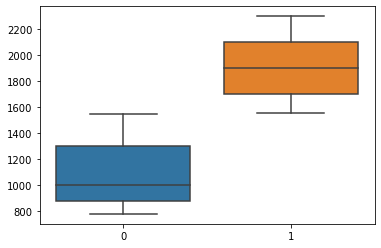

In [23]:
sns.boxplot(x=y, y=np.ravel(x));

Now, let's fit the model. Please note that this algorithm is sensitive to different scales of features. We, therefore, should normalize the feature. 

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
sc = scaler.fit(x)
X = sc.transform(x)

model = LogisticRegression()
model.fit(X, y)
predicted_classes = model.predict(X)

# displaying intercept and coefficient
print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_)

# displaying the outcome of the model
print('Predictions at the conservative theshold (0.5): ', predicted_classes)
print('Predicted probabilty of being a dog: \n', model.predict_proba(X).T[1])

Intercept: [-0.00469259]
Coefficient: [[1.38859054]]
Predictions at the conservative theshold (0.5):  [0 0 0 0 1 1 1 1 1 1]
Predicted probabilty of being a dog: 
 [0.1917293  0.14445315 0.11198777 0.35689194 0.52981399 0.53334124
 0.63282701 0.84258749 0.75231286 0.90415163]


Unlike regressing countinuous values, we can't say the inference of the model directly. So one unit in X increases, doesn't mean -1.059 point of probability decreases. Instead, the slope and intercept are used as inputs for the sigmoid function.

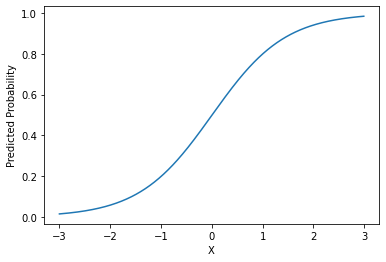

In [25]:
def sigmoid(x, intercept, coef):
    z = intercept + (coef * x)
    results = (1 / (1+(math.e)**-z))
    return results

x_s = np.arange(-3, 3, 0.01).reshape(-1, 1)
sig = sigmoid(x_s, model.intercept_, model.coef_)

plt.plot(x_s, sig)
plt.xlabel('X')
plt.ylabel('Predicted Probability')
plt.show()

The effect of linear regression terms on the sigmoid curve

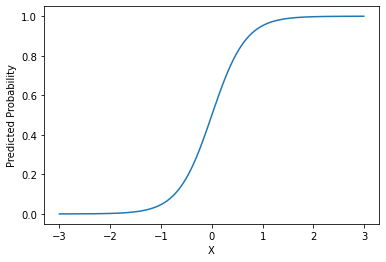

In [26]:
# values of slops demo
x_s = np.arange(-3, 3, 0.01).reshape(-1, 1)
sig = sigmoid(x_s, 0, 3)

plt.plot(x_s, sig)
plt.xlabel('X')
plt.ylabel('Predicted Probability')
plt.show()

Let's measure the performance. Luckily, sklearn has provided functions to get these values.

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y, predicted_classes))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.83      1.00      0.91         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10



We misclassified one observation here.

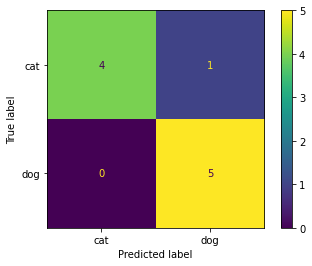

In [28]:
cm = confusion_matrix(y, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['cat', 'dog'])
disp.plot()
plt.show()

Now, apply the model with the unseen data. 

[1 1 1]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



C:\Users\natanop.pimonsathian\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\natanop.pimonsathian\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\natanop.pimonsathian\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


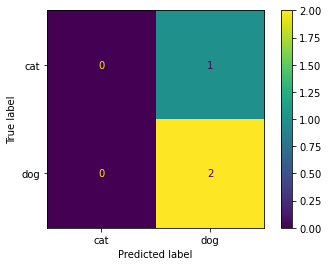

In [29]:
x_new = np.array([[2000], [1600], [2800]])
y_new = np.array([1, 0 ,1])

X_new = sc.transform(x_new)
pred_new = model.predict(X_new)

print(pred_new)
print(classification_report(y_new, pred_new))

cm = confusion_matrix(y_new, pred_new)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['cat', 'dog'])
disp.plot()
plt.show()

The output of the logistic classfication is predicted probability and that gives some room to adjust the decision threshold. Assuming that the threshold of 50% is too low and we want to increase to 60%. Hence, the outcomes that have values more than 0.60 will be predicted as a dog. 

[1 0 1]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



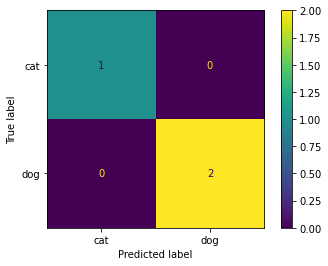

In [30]:
# checking the training set
threshold = 0.60
pred_threshold_55 = np.where(model.predict_proba(X_new).T[1] > threshold, 1, 0)

print(pred_threshold_55)
print(classification_report(y_new, pred_threshold_55))

cm = confusion_matrix(y_new, pred_threshold_55)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['cat', 'dog'])
disp.plot()
plt.show()

Negative log loss can be also retrived.

In [31]:
from sklearn.metrics import log_loss
log_loss = log_loss(y_true=y_new, y_pred=model.predict_proba(X_new))
log_loss

0.3597012466517515

### 4. Logistic regression classifier in action : churn prediction
Let build a model to classify whether a customer is churn. In this case, the data record the field 'Exited' as a indication of churn (0 = No, 1 = Yes). The remain columns are the features to be analyzed and added into the model. <br>

The training file consists data collected in France and Spain. We will be experimenting if a model can be genalized to the country of Germany (test set).

In [32]:
data = pd.read_csv('../dataset/Churn_Modelling_Train.csv')
data.head()

,Unnamed: 0,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


No missing values found

In [33]:
data.isnull().sum()

Unnamed: 0         0
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Delete some columns

In [34]:
data = data.drop(columns=['Unnamed: 0', 'RowNumber', 'Surname', 'Geography'])

Train-test split

In [35]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(data, test_size=0.2, random_state=42)

train_df = train_df.copy()
test_df = test_df.copy()

train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

print(f'Training set has {len(train_df)} rows')
print(f'Test set has {len(test_df)} rows')

Training set has 5992 rows
Test set has 1499 rows


Doing some explorations on the training set:

#### Quick excerise 2
Create boxplots to examine the difference of numeric features as function of distinctive class of churning. <br>
Tips: you need to convert the target variable into a categorical features using map()

In [36]:
train_df['Exited'] = train_df['Exited'].map({0:'no', 1:'yes'})

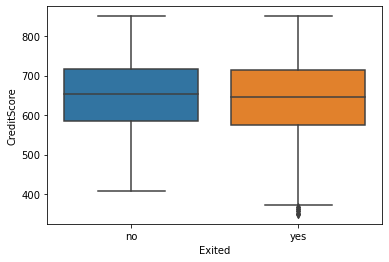

In [38]:
# Credit score 
sns.boxplot(x=train_df['Exited'], y=train_df['CreditScore']);

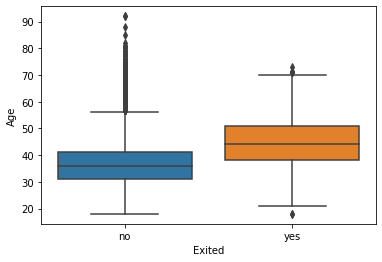

In [37]:
# Age
sns.boxplot(x=train_df['Exited'], y=train_df['CreditScore']);

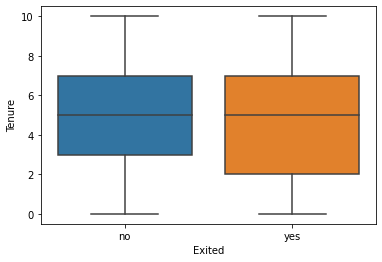

In [38]:
# Tenure


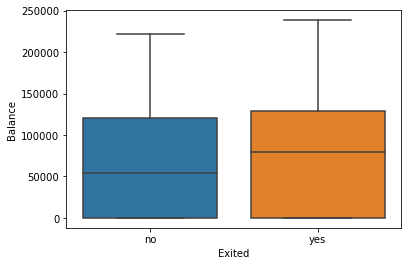

In [39]:
# Balance


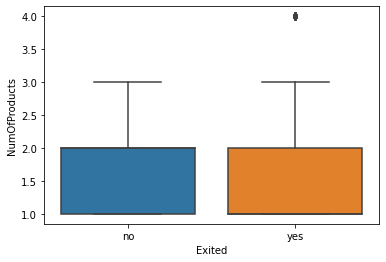

In [40]:
# NumOfProducts


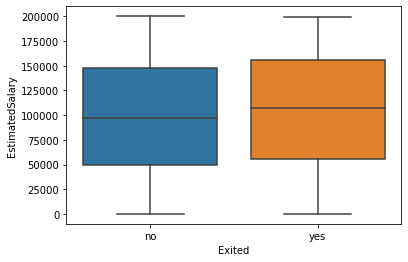

In [41]:
# EstimatedSalary


##### Quick exercise 3 
What is the class distribution?

In [40]:
train_df['Exited'].value_counts(normalize=True)

no     0.835614
yes    0.164386
Name: Exited, dtype: float64

In [41]:
train_df['Exited'].value_counts()

no     5007
yes     985
Name: Exited, dtype: int64

#### Building a classifier
##### We will do this together as exercise 4

In [42]:
X_train = train_df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']]
y_train = train_df['Exited'].map({'yes': 1, 'no': 0})

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
sc = scaler.fit(X_train)
X = sc.transform(X_train)
y = y_train

model = LogisticRegression()
model.fit(X, y)
predicted_classes = model.predict(X)

# displaying intercept and coefficient
print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_)

Intercept: [-1.76223607]
Coefficient: [[-0.07805126  0.6097088  -0.06248981  0.16903262 -0.02615189  0.10436442]]


              precision    recall  f1-score   support

           0       0.83      0.98      0.90      5007
           1       0.12      0.01      0.02       985

    accuracy                           0.82      5992
   macro avg       0.48      0.50      0.46      5992
weighted avg       0.72      0.82      0.76      5992



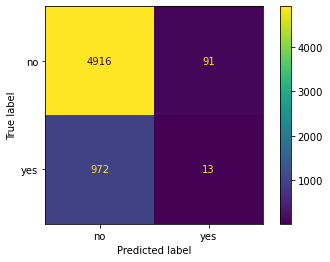

Applying to the test set

In [47]:
X_test = test_df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']]
y_test = test_df['Exited']

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      1261
           1       0.11      0.02      0.03       238

    accuracy                           0.82      1499
   macro avg       0.48      0.50      0.47      1499
weighted avg       0.72      0.82      0.76      1499



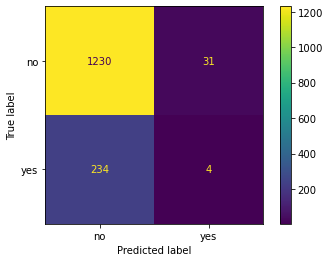

Let's tweak the performance a bit by using parameters tuning

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss, make_scorer

# data
scaler = StandardScaler()
sc = scaler.fit(X_train)
X = sc.transform(X_train)
y = y_train

# load model
lr_clf1 = LogisticRegression()
cv = 10

# params
grid = dict()
grid['penalty'] = ['l2']
grid['C'] = [10e-4, 10e-3, 10e-2, 10e-1, 1, 10e01, 10e02, 10e03, 10e04]
grid['solver'] = ['lbfgs']
grid['max_iter'] = [20, 50, 100, 200, 500, 1000]
grid['intercept_scaling'] = [None]

# define scoring - log loss
LogLoss = make_scorer(log_loss, greater_is_better=False, needs_proba=True, labels=[0, 1])

# perform the search
search = GridSearchCV(lr_clf1, grid, cv=cv, n_jobs=-1, scoring=LogLoss, return_train_score=True)
model_lr1 = search.fit(X, y)

In [50]:
# best score
search.best_score_

-0.4156589398415343

In [51]:
# best parameters
search.best_params_

{'C': 0.1,
 'intercept_scaling': None,
 'max_iter': 20,
 'penalty': 'l2',
 'solver': 'lbfgs'}

Evaluation on the training set

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      5007
           1       0.11      0.01      0.02       985

    accuracy                           0.82      5992
   macro avg       0.47      0.50      0.46      5992
weighted avg       0.72      0.82      0.76      5992



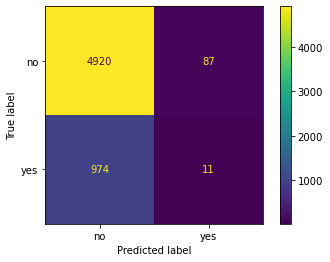

In [52]:
predicted_classes = model_lr1.predict(X)

print(classification_report(y, predicted_classes))

cm = confusion_matrix(y, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['no', 'yes'])
disp.plot()
plt.show()

Evaluation on the test set

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      1261
           1       0.11      0.02      0.03       238

    accuracy                           0.82      1499
   macro avg       0.48      0.50      0.47      1499
weighted avg       0.72      0.82      0.76      1499



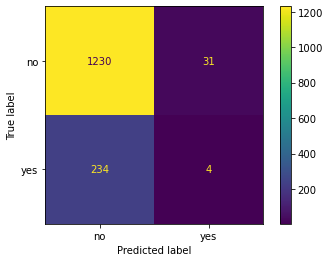

In [53]:
X = sc.transform(X_test)
predicted_classes = model_lr1.predict(X)

print(classification_report(y_test, predicted_classes))

cm = confusion_matrix(y_test, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['no', 'yes'])
disp.plot()
plt.show()

The possible problem is that the class distribution is unbalance. So the algorithm is biased to the 'No' Class. We need to do oversampling by using the SMOTE technique

In [54]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\natanop.pimonsathian\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [55]:
from imblearn.over_sampling import SMOTE
# smote processing
oversample = SMOTE()
X_train_s, y_train_s = oversample.fit_resample(X_train, y_train)
len(X_train_s)

10014

In [56]:
# data
scaler = StandardScaler()
sc = scaler.fit(X_train)
X = sc.transform(X_train_s)
y = y_train_s

# load model
lr_clf2 = LogisticRegression()
cv = 10

# params
grid = dict()
grid['penalty'] = ['l2']
grid['C'] = [10e-4, 10e-3, 10e-2, 10e-1, 1, 10e01, 10e02, 10e03, 10e04]
grid['solver'] = ['lbfgs']
grid['max_iter'] = [20, 50, 100, 200, 500, 1000]
grid['intercept_scaling'] = [None]

# define scoring - log loss
LogLoss = make_scorer(log_loss, greater_is_better=False, needs_proba=True, labels=[0, 1])

# perform the search
search = GridSearchCV(lr_clf2, grid, cv=cv, n_jobs=-1, scoring=LogLoss, return_train_score=True)
model_lr2 = search.fit(X, y)

In [57]:
# best score
print(search.best_score_)
print(search.best_params_)

-0.6048768830222341
{'C': 0.1, 'intercept_scaling': None, 'max_iter': 20, 'penalty': 'l2', 'solver': 'lbfgs'}


              precision    recall  f1-score   support

           0       0.70      0.71      0.70      5007
           1       0.70      0.70      0.70      5007

    accuracy                           0.70     10014
   macro avg       0.70      0.70      0.70     10014
weighted avg       0.70      0.70      0.70     10014



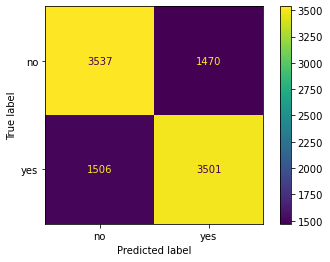

In [58]:
predicted_classes = model_lr2.predict(X)

print(classification_report(y, predicted_classes))

cm = confusion_matrix(y, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['no', 'yes'])
disp.plot()
plt.show()

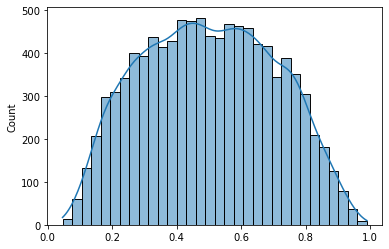

In [59]:
proba = model_lr2.predict_proba(X).T[1]
sns.histplot(proba, kde=True);

              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1261
           1       0.29      0.66      0.40       238

    accuracy                           0.69      1499
   macro avg       0.60      0.68      0.60      1499
weighted avg       0.82      0.69      0.73      1499



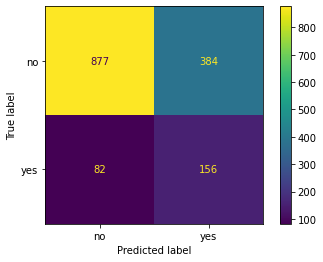

In [60]:
X = sc.transform(X_test)
predicted_classes = model_lr2.predict(X)

print(classification_report(y_test, predicted_classes))

cm = confusion_matrix(y_test, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['no', 'yes'])
disp.plot()
plt.show()

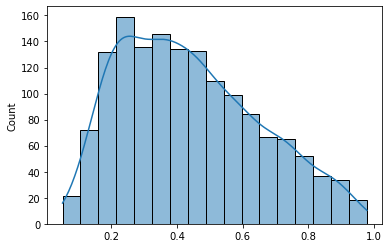

In [61]:
proba = model_lr2.predict_proba(X).T[1]
sns.histplot(proba, kde=True);